# Naive Bayes

## 1. Classifying Digits
In this part we will test digits classification on the MNIST dataset, using Bernoulli Naive Bayes (a generative model).

The MNIST dataset contains 28x28 grayscale images of handwritten digits between 0 and 9 (10 classes). For mathmatical analysis clarity, and for matching expected API, flatten each image to create a 1D array with 784 elements.

### Loading the MNIST dataset
Load the MNIST data set. The digits dataset is one of datasets scikit-learn comes with that do not require the downloading of any file from some external website. Use
>```
from sklearn.datasets import fetch_openml
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)
```

Plot a single sample of each digit as the original image, so you get a feeling how the data looks like.

Finally, divide your data into train and test sets, using 1/7 of the data for testing.


### Bernoulli Naive Bayes
If we know how the digits are generated, then we know how to classify them (simply choose the digit class which will maximize the posterior probability) --- but which model should we use for describing the digits generation?

In this part we will try a very simplified model of digits creation (which is obviously not the same as the "real" model), using a Naive Bayes over an underlying Bernoulli distribution --- that is, we will assume that given a digit class, the pixels of the images are the result of independent coin flips, each with its own "head" probability.

Note that since we assume each pixl is either 0 (black) or 1 (white), we will need to adjust (preprocess) our data accrodingly (see below).

So, the model is stated as follows:
$$
\begin{align}
\text{Domain} && x \in \{0,1\}^{784} \\
\text{Prior} && \pi_j = \Pr(y=j) \\
\text{Likelihood} && P_j(x) = \Pr(x | y=j) \\
\end{align}
$$

Where for each $i\in 0\ldots 784$ it holds that
$$
P_{ji}(x_i) = \Pr(x_i | y=j) =
\begin{cases}
p_{ji} & \text{if } x_i=1 \\
1-p_{ji} & \text{if } x_i=0 \\
\end{cases}
$$


#### Question 1
Write the classification rule based on this Naive Bayes model.
How would you esitmate each of the parameters of the model based on the trainning data?


**Bonus:** Think of edge cases which may effect your estimator in an undesired way.

#### Answer 1
$$
\text{Predicted Class} = \underset{k}{\mathrm{argmax}} \ P(C_k) \prod_{i=1}^{n} P(x_i | C_k)
$$**Prior Probability \$( P(C_k)$ \)**: proportion of each digit in the training set.

**Likelihoo \$( P(x_i|C_k$ \)\)**: For each pixel \( i \) and class \( k \), calculate the probability of pixel \( i \) being on (1) or off (0). This is typically done by counting the number of times pixel \( i \) is on for all instances of class \( k \) and dividing by the total number of instances of class \( k \)state.
 a small constant (like 1) to the count for each class and pixel state.


Edge Cases:

Zero Frequency Problem: Without smoothing, if a pixel never appears in a state for a given class in the training data, the probability would be zero, which can disproportionately affect the posterior probability.

Data Imbalance: If some classes are significantly underrepresented in the training data, the model may be biased towards the more common classes.

High-Dimensional Data: In cases where the number of features (pixels) is very high, the independence assumption of Naive Bayes might lead to incorrect conclusions, especially if there are correlations between pixels.

#### Question 2
Run a Naive Bayes classifier on the training data and apply predictions on the test data. Use the [sklearn.naive_bayes.BernoulliNB](http://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.BernoulliNB.html) implementation (see the [source code for sklearn.naive_bayes](https://github.com/scikit-learn/scikit-learn/blob/master/sklearn/naive_bayes.py) for details).

Remember we need to preprocess the data in this case such that each pixel would become either black (0) or white (1). For this, use the `binarize` parameter of the implementation. Set this value to $0$ (this is the default), which in this case would mean every pixel with non-zero value will be set to 1.

1. Plot the mean image of each class (estimated $\hat{p}_{ji}$) and generate one sample of each class (remember, you can do this since this is a generative model). You will need to access the `feature_log_prob_` attribute of the trained model.

2. Plot the confusion matrix of your classifier, as claculated on the test data (it is recommended to use [sklearn.metrics.confusion_matrix](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html)). Calculate the total accuracy (fraction of correctly classified images), and summarize the results in your own words.

3. Think of a way you can find the optimal threshold of the binarization part. **There is no need to actually perform this task --- just describe what you would have done.**


#### Answer 2
Put you answer here...

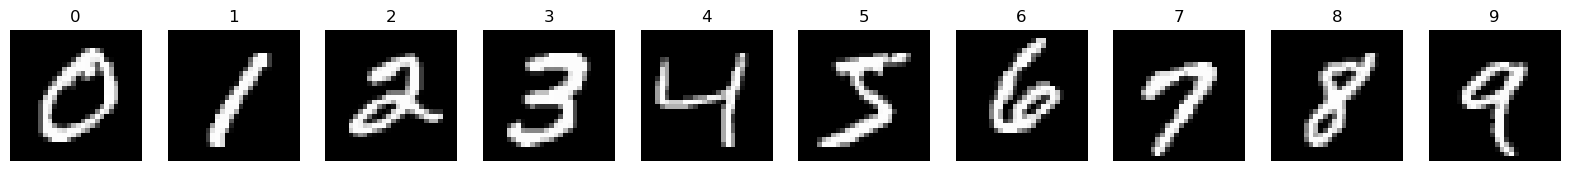

In [1]:
# code goes here
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import confusion_matrix, accuracy_score 

X, y = fetch_openml('mnist_784', version=1, return_X_y=True, parser='auto')

fig, axes = plt.subplots(1, 10, figsize=(20, 5))
for i in range(10):
    image = X[y == str(i)].iloc[0].values.reshape(28, 28)
    axes[i].imshow(image, cmap='gray')
    axes[i].set_title(str(i))
    axes[i].axis('off')
plt.show()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/7, random_state=42)

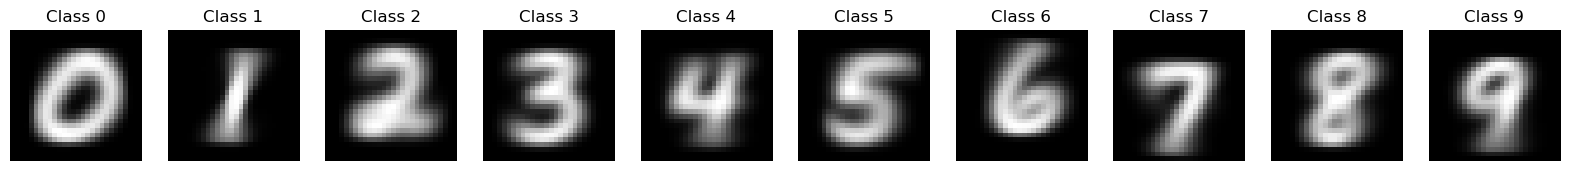

In [2]:
model = BernoulliNB(binarize=0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

fig, axes = plt.subplots(1, 10, figsize=(20, 5))
for i in range(10):
    mean_image = np.exp(model.feature_log_prob_[i]).reshape(28, 28)
    #plt.subplot(2, 5, i+1)
    axes[i].imshow(mean_image, cmap='gray')
    axes[i].set_title(f'Class {i}')
    axes[i].axis('off')
plt.show()

Total Accuracy:0.8348


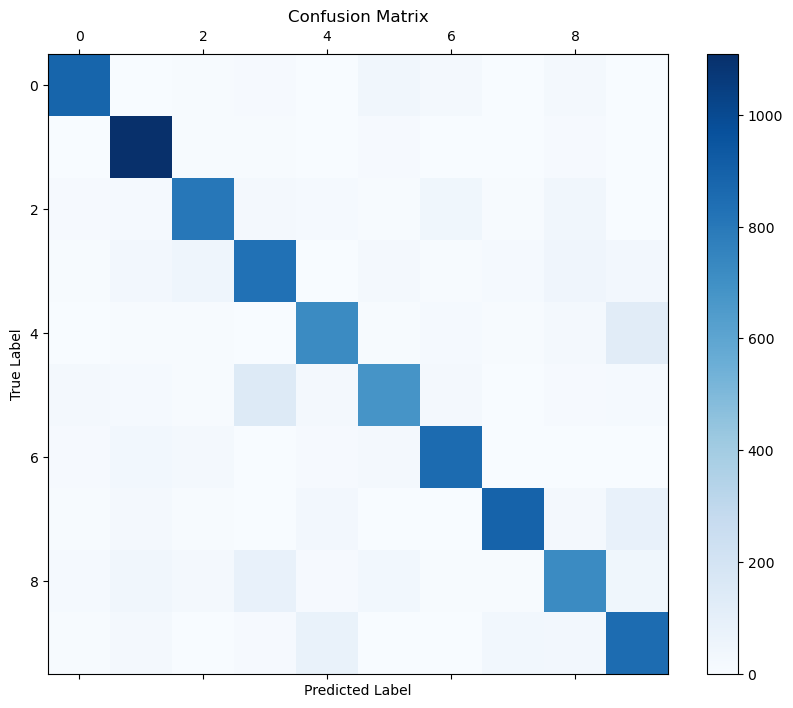

In [3]:
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10, 8))
plt.matshow(conf_matrix, cmap='Blues', fignum=1)
plt.title('Confusion Matrix')
plt.colorbar()
plt.ylabel('True Label')
plt.xlabel('Predicted Label')

accuracy = accuracy_score(y_test, y_pred)
print(f'Total Accuracy:{accuracy}')

1. Cross-validation: Use cross-validation to assess the performance of the model with different binarization thresholds. This ensures that your results are not dependent on a particular training-test split.

2. Grid Search of Threshold Values: Define a range of potential threshold values. For instance, we could explore a range from 0 to 1 with a small increment, like 0.05 or 0.1.

## 2. Classifing Text Documents using Multinomial Naive Bayes
In this exercise you will classify the "20 newsgroups" data set using your own naive bayes classifier and compare to the scikit learn built in version.

The 20 newsgroups dataset comprises around 18000 newsgroups posts on 20 topics split in two subsets: one for training (or development) and the other one for testing (or for performance evaluation). The split between the train and test set is based upon messages posted before and after a specific date.


* Load the **train** data using `from sklearn.datasets import fetch_20newsgroups`. remove headers, footers and quotes (see documentation)
* Use `sklearn.feature_extraction.text import CountVectorizer` to count words (stop_words='english')
* Write a class `NaiveBayes(BaseEstimator, ClassifierMixin)` and implement its `fit`, `predict` and `predict_proba` methods.
* use `sklearn.pipeline.make_pipeline` to chain the vectroizer and model.
* note: limit the vocuabolary size if you suffer memory issues
* compare the accuracy over the **test** data. You can use `accuracy_score, classification_report`
* compare to the built in `sklearn.naive_bayes.MultinomialNB`. If there are differences try to think why
* optimize performance in respect to vectorizer hyper parameters (e.g. max_features, max_df etc.).

### Optional: Model interpretability
Find the most important features for a **specific** decision of a NB classifier.
Because the model has learned the prior $p(x_i|c)$ during the training, the contribution of an individual feature value can be easily measured by the posterior, $p(c|x_i)=p(c)p(x_i|c)/p(x_i)$
Implement a function which gets a scikit-learn NB model as input and returns $P(c|x_i)$:

`def calc_p_c_given_xi(model)`

Hint: Use the following model properties:

* `model.class_log_prior_`
* `model.feature_log_prob_`

Note: remember these are logs and you need to use np.exp and normalize to get $P(c|x_i)$
Another hint: use numpy built-in broadcasting property.

* Use the interpretation to examine errors of the classifier where $\hat{c}\ne c$. Which top words support the correct class and which support the wrong class? You can use the `print_txt` below to color words.

Bonus: How can you correct the analyzed error?

To read more about model interpretation, see the blogpost below and my tutorial:
* https://lilianweng.github.io/lil-log/2017/08/01/how-to-explain-the-prediction-of-a-machine-learning-model.html
* https://github.com/Shaboodi/right_but_why

In [4]:
import string
def print_txt(txt, hot, cold):
  """
  print the text, coloring hot and cold words with colors
  """
  cold_color='\x1b[41;37m{}\x1b[0m'
  hot_color='\x1b[42;37m{}\x1b[0m'
  def color(token):
    lower = str(token).lower()
    lower = lower.replace('\t','').replace('\n','')
    lower = lower.translate(string.punctuation)
    if (lower in hot) and (lower in cold):
      return mid_color.format(token)
    elif lower in hot:
      return hot_color.format(token)
    elif lower in cold:
      return cold_color.format(token)
    else:
      return token
  colored_txt = " ".join([color(token) for token in txt.split(' ')])
  print(colored_txt)
print_txt('This word support the first class but this the other', ['word'],['other'])

This word support the first class but this the other


In [30]:
from sklearn.base import BaseEstimator, ClassifierMixin

class NaiveBayes(BaseEstimator, ClassifierMixin):
  def fit(self, x, y):
    #print(x.vocabulary_)
    classes, class_proba = np.unique(y, return_counts=True)
    class_proba = class_proba / len(y)
    self.class_proba = class_proba.reshape(-1, 1)
    words_matrix = x.toarray()
    n_words = np.sum(words_matrix, axis=0)
    #print(n_words.shape[0])
    grouped = np.array([np.sum(words_matrix[y == label], axis=0) for label in np.unique(y)])
    n_words_per_class = np.sum(grouped, axis=1).reshape(-1, 1) 
    self.words_proba = ((grouped) + 1) / (n_words_per_class +  n_words.shape[0])
    #print(self.words_proba)
  def predict_log_proba(self, x):
    words_proba_per_class = self.words_proba * self.class_proba  
    proba = np.dot(x, words_proba_per_class.T)
    return np.log(proba + 1e-9)
  def predict(self, x):
    pred_matrix = x.toarray()
    proba = self.predict_log_proba(pred_matrix)
    return np.argmax(proba, axis=1)

In [48]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import make_pipeline

newsgroups_train = fetch_20newsgroups(subset='train', remove=('headers', 'footers', 'quotes'))
newsgroups_test = fetch_20newsgroups(subset='test', remove=('headers', 'footers', 'quotes'))

X_train = newsgroups_train.data
y_train = newsgroups_train.target

pipeline = make_pipeline(
    CountVectorizer(stop_words='english'),
    NaiveBayes()
)
#vectorizer = CountVectorizer(stop_words='english')
#X_train = vectorizer.fit_transform(X_train)
pipeline.fit(X_train, y_train)
#pipeline.named_steps['countvectorizer'].vocabulary_

MemoryError: Unable to allocate 8.54 GiB for an array with shape (11314, 101322) and data type int64

In [32]:
X_test = newsgroups_test.data
y_test = newsgroups_test.target
y_pred  = pipeline.predict(X_test)
y_pred 

array([15,  1, 15, ..., 15,  3, 15], dtype=int64)

In [33]:
from sklearn.metrics import accuracy_score, classification_report

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Получаем полный отчет о классификации
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

Accuracy: 0.419676048858205
Classification Report:
               precision    recall  f1-score   support

           0       0.06      0.05      0.05       319
           1       0.62      0.43      0.51       389
           2       0.29      0.02      0.04       394
           3       0.42      0.58      0.48       392
           4       0.73      0.31      0.44       385
           5       0.33      0.80      0.47       395
           6       0.77      0.52      0.62       390
           7       0.81      0.41      0.55       396
           8       0.94      0.30      0.45       398
           9       0.79      0.31      0.45       397
          10       0.55      0.78      0.65       399
          11       0.33      0.73      0.46       396
          12       0.60      0.11      0.19       393
          13       0.76      0.32      0.45       396
          14       0.78      0.48      0.59       394
          15       0.21      0.87      0.34       398
          16       0.60      

In [113]:
data = np.array([[1, 2], [3, 4], [5, 6], [7, 8], [10, 10]]) 
labels = np.array([1, 2, 1, 2, 2]) 
sum = np.array([2, 2])
grouped_data = [np.sum(data[labels == label], axis=0) for label in np.unique(labels)]
grouped_data = np.array(grouped_data)
#np.sum(grouped_data, axis=1)
grouped_data/sum

array([[ 3.,  4.],
       [10., 11.]])

In [12]:
from sklearn.naive_bayes import MultinomialNB

pipeline_2 = make_pipeline(
    CountVectorizer(stop_words='english'),
    MultinomialNB()
)

pipeline_2.fit(X_train, y_train)

y_pred = pipeline_2.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.6343600637280935
Classification Report:
               precision    recall  f1-score   support

           0       0.65      0.30      0.41       319
           1       0.58      0.69      0.63       389
           2       0.40      0.01      0.01       394
           3       0.53      0.72      0.61       392
           4       0.74      0.56      0.64       385
           5       0.56      0.81      0.66       395
           6       0.85      0.69      0.76       390
           7       0.82      0.70      0.76       396
           8       0.91      0.62      0.73       398
           9       0.94      0.74      0.83       397
          10       0.58      0.91      0.71       399
          11       0.54      0.79      0.64       396
          12       0.71      0.49      0.58       393
          13       0.81      0.79      0.80       396
          14       0.72      0.75      0.73       394
          15       0.46      0.91      0.61       398
          16       0.57     

In [37]:
np.exp(pipeline_2.named_steps['multinomialnb'].class_log_prior_)

array([0.04242531, 0.05161747, 0.05223617, 0.05214778, 0.05108715,
       0.05241294, 0.05170585, 0.05250133, 0.05285487, 0.05276648,
       0.05303164, 0.05258971, 0.05223617, 0.05250133, 0.05241294,
       0.05294326, 0.04825879, 0.04984974, 0.04109952, 0.03332155])

In [106]:
import numpy as np

def calc_p_c_given_xi(model):
    # Преобразование логарифмических вероятностей обратно в вероятности
    class_prior = np.exp(model.class_log_prior_)
    feature_prob = np.exp(model.feature_log_prob_)

    # Нормализация вероятностей признаков для каждого класса
    feature_prob /= feature_prob.sum(axis=1, keepdims=True)

    # Вклад каждого признака в апостериорную вероятность класса
    contribution = feature_prob * class_prior[:, np.newaxis]
    return contribution


Шаг 2: Анализ ошибок классификации
Используйте реализованную функцию calc_p_c_given_xi для анализа ошибок классификации. Вы можете рассмотреть случаи, где классификатор сделал неправильные предсказания, и проанализировать, какие слова вносили наибольший вклад в принятие решения.

Шаг 3: Исправление ошибок
Для корректировки ошибок классификации можно принять во внимание вклады признаков и попытаться понять, почему модель сделала ошибку. Возможные действия:

Перебалансировка набора данных: Если некоторые классы представлены недостаточно, можно добавить больше примеров для этих кла
ссов.
Изменение признаков: Исключение или изменение веса некоторых признаков, которые часто вносят вклад в неправильные классифи
кации.
Регуляризация: Использование техник регуляризации, если это возможно, для уменьшения переобучения модели на специфичных для обучающего набора данных признаках